<a href="https://colab.research.google.com/github/AkhilaSunesh/CampusCity-Supply-Optimization-MP1-/blob/main/Micro_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#initial
import pulp

# Initialize the problem
model = pulp.LpProblem("Campus_Emergency_Supply_Distribution", pulp.LpMinimize)

# ==========================================
# 1. DECISION VARIABLES
# ==========================================

# Binary Variables (1 if warehouse is selected, 0 otherwise)
y_north = pulp.LpVariable('Open_WH_NORTH', cat='Binary')
y_south = pulp.LpVariable('Open_WH_SOUTH', cat='Binary')
y_east  = pulp.LpVariable('Open_WH_EAST',  cat='Binary')

# Continuous Variables (Units shipped from W to F)
# From NORTH
x_n_med = pulp.LpVariable('Ship_North_to_MedCenter', lowBound=0)
x_n_eng = pulp.LpVariable('Ship_North_to_EngBldg', lowBound=0)
x_n_sci = pulp.LpVariable('Ship_North_to_Science', lowBound=0)
x_n_da  = pulp.LpVariable('Ship_North_to_DormA', lowBound=0)
x_n_db  = pulp.LpVariable('Ship_North_to_DormB', lowBound=0)
x_n_lib = pulp.LpVariable('Ship_North_to_Library', lowBound=0)

# From SOUTH
x_s_med = pulp.LpVariable('Ship_South_to_MedCenter', lowBound=0)
x_s_eng = pulp.LpVariable('Ship_South_to_EngBldg', lowBound=0)
x_s_sci = pulp.LpVariable('Ship_South_to_Science', lowBound=0)
x_s_da  = pulp.LpVariable('Ship_South_to_DormA', lowBound=0)
x_s_db  = pulp.LpVariable('Ship_South_to_DormB', lowBound=0)
x_s_lib = pulp.LpVariable('Ship_South_to_Library', lowBound=0)

# From EAST
x_e_med = pulp.LpVariable('Ship_East_to_MedCenter', lowBound=0)
x_e_eng = pulp.LpVariable('Ship_East_to_EngBldg', lowBound=0)
x_e_sci = pulp.LpVariable('Ship_East_to_Science', lowBound=0)
x_e_da  = pulp.LpVariable('Ship_East_to_DormA', lowBound=0)
x_e_db  = pulp.LpVariable('Ship_East_to_DormB', lowBound=0)
x_e_lib = pulp.LpVariable('Ship_East_to_Library', lowBound=0)

# ==========================================
# 2. OBJECTIVE FUNCTION
# ==========================================
# Minimize: (Annual Fixed Costs * y) + (Transportation Costs * x)

# Annual Fixed Costs (Calculated: Construction/10 + DailyOps*365)
# North: 30,000 + 292,000 = 322,000
# South: 28,000 + 255,500 = 283,500
# East:  32,000 + 328,500 = 360,500

model += (
    322000*y_north + 283500*y_south + 360500*y_east +  # Fixed Costs
    3.80*x_n_med + 4.10*x_n_eng + 4.00*x_n_sci + 3.70*x_n_da + 4.50*x_n_db + 4.20*x_n_lib +
    4.60*x_s_med + 3.90*x_s_eng + 3.80*x_s_sci + 4.80*x_s_da + 3.75*x_s_db + 4.00*x_s_lib +
    4.90*x_e_med + 4.20*x_e_eng + 4.10*x_e_sci + 5.00*x_e_da + 4.80*x_e_db + 3.90*x_e_lib
), "Total_Annual_Cost"

# ==========================================
# 3. CONSTRAINTS
# ==========================================

# Demand Satisfaction (Annual Demand = Daily * 365)
model += x_n_med + x_s_med + x_e_med == 80 * 365, "Demand_MedCenter"
model += x_n_eng + x_s_eng + x_e_eng == 30 * 365, "Demand_EngBuilding"
model += x_n_sci + x_s_sci + x_e_sci == 35 * 365, "Demand_ScienceHall"
model += x_n_da  + x_s_da  + x_e_da  == 55 * 365, "Demand_DormA"
model += x_n_db  + x_s_db  + x_e_db  == 45 * 365, "Demand_DormB"
model += x_n_lib + x_s_lib + x_e_lib == 25 * 365, "Demand_Library"

# Capacity Constraints (Annual Capacity = Daily * 365)
model += x_n_med + x_n_eng + x_n_sci + x_n_da + x_n_db + x_n_lib <= (400 * 365) * y_north, "Cap_North"
model += x_s_med + x_s_eng + x_s_sci + x_s_da + x_s_db + x_s_lib <= (350 * 365) * y_south, "Cap_South"
model += x_e_med + x_e_eng + x_e_sci + x_e_da + x_e_db + x_e_lib <= (450 * 365) * y_east, "Cap_East"

# Selection Constraint (Exactly 2 warehouses)
model += y_north + y_south + y_east == 2, "Select_Exactly_Two"

# Budget Constraint (Total Cost <= 1,500,000)
model += model.objective <= 1500000, "Budget_Limit"

# ==========================================
# 4. SOLVE AND OUTPUT
# ==========================================

model.solve()

print("=== CAMPUS LOGISTICS OPTIMIZATION ===")
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Total Annual Cost: ${pulp.value(model.objective):,.2f}")

print("\n--- Selected Warehouses ---")
if y_north.varValue == 1: print("✅ NORTH CAMPUS WAREHOUSE")
if y_south.varValue == 1: print("✅ SOUTH CAMPUS WAREHOUSE")
if y_east.varValue  == 1: print("✅ EAST GATE WAREHOUSE")

print("\n--- Top Shipment Paths ---")
# Example of listing a few for brevity
if x_n_med.varValue > 0: print(f"North -> MedCenter: {x_n_med.varValue} units")
if x_s_db.varValue > 0:  print(f"South -> Dorm B: {x_s_db.varValue} units")

=== CAMPUS LOGISTICS OPTIMIZATION ===
Status: Optimal
Total Annual Cost: $980,081.25

--- Selected Warehouses ---
✅ NORTH CAMPUS WAREHOUSE
✅ SOUTH CAMPUS WAREHOUSE

--- Top Shipment Paths ---
North -> MedCenter: 29200.0 units
South -> Dorm B: 16425.0 units


In [6]:
print("WAREHOUSES COLUMNS:")
print(warehouses_df.columns)

print("\nFACILITIES COLUMNS:")
print(facilities_df.columns)

print("\nDEMANDS COLUMNS:")
print(demands_df.columns)

print("\nTRANSPORT COLUMNS:")
print(transport_df.columns)

WAREHOUSES COLUMNS:
Index(['warehouse_id', 'warehouse_name', 'latitude', 'longitude', 'capacity',
       'construction_cost', 'operational_cost', 'fixed_cost'],
      dtype='object')

FACILITIES COLUMNS:
Index(['facility_id', 'facility_name', 'facility_type', 'latitude',
       'longitude'],
      dtype='object')

DEMANDS COLUMNS:
Index(['facility_id', 'daily_demand', 'priority_level'], dtype='object')

TRANSPORT COLUMNS:
Index(['from_warehouse', 'to_facility', 'distance_km', 'cost_per_unit'], dtype='object')


Loading data...
Solving optimization model...

OPTIMIZATION STATUS: Optimal

Total Annual Cost: $959,466.05
  Fixed Cost:      $605,500.00
  Transport Cost:  $353,966.05
  Remaining Budget: $540,533.95

Selected Warehouses:
  [X] WH_NORTH
  [X] WH_SOUTH
  [ ] WH_EAST

Generating network map...
Map saved as 'optimal_distribution_map.png'


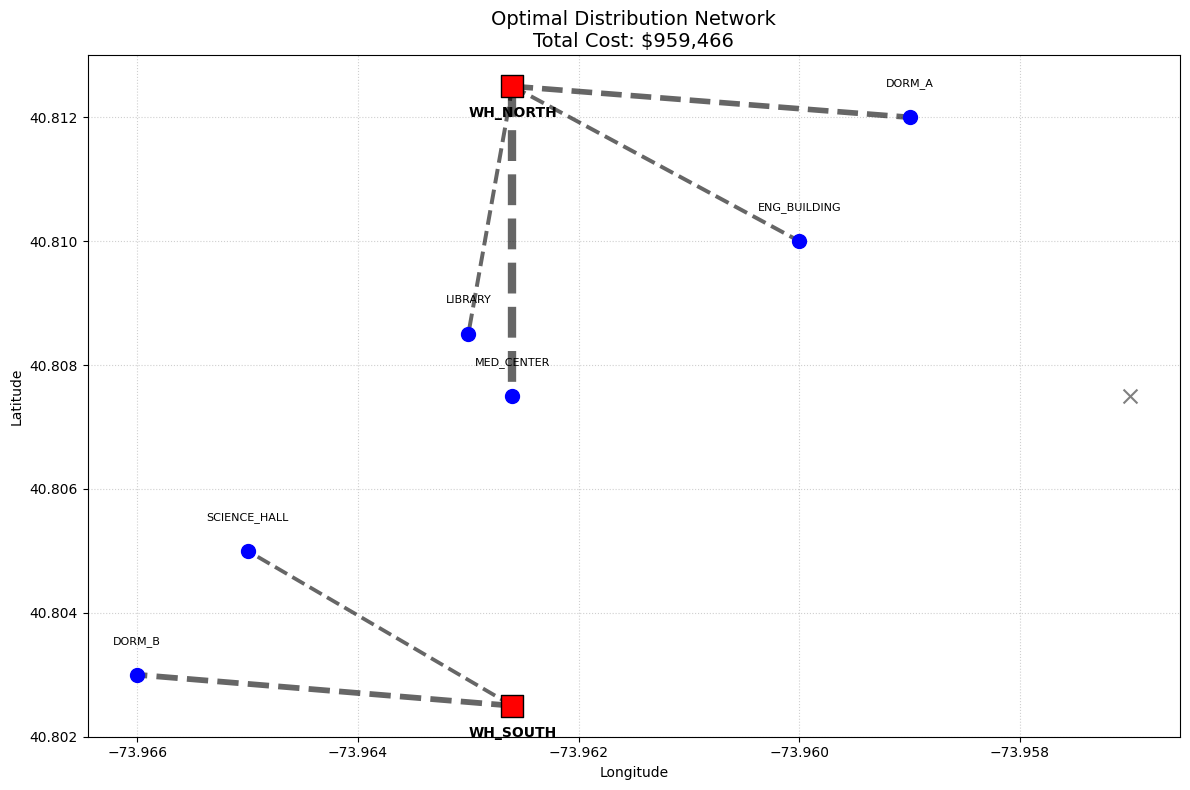

In [3]:
# ==========================================================
# CAMPUS CITY EMERGENCY DISTRIBUTION OPTIMIZATION
# Complete Model + Visualization
# ==========================================================

import pandas as pd
import pulp
import matplotlib.pyplot as plt

# ==========================================================
# 1. LOAD DATA
# ==========================================================

print("Loading data...")

demands_df = pd.read_csv("demands.csv")
warehouses_df = pd.read_csv("warehouses.csv")
transport_df = pd.read_csv("transportation_costs.csv")
facilities_df = pd.read_csv("facilities.csv")

# Clean column names
for df in [demands_df, warehouses_df, transport_df, facilities_df]:
    df.columns = df.columns.str.strip().str.lower()

# ==========================================================
# 2. PARAMETERS
# ==========================================================

TARGET_FACILITIES = [
    'MED_CENTER', 'ENG_BUILDING', 'SCIENCE_HALL',
    'DORM_A', 'DORM_B', 'LIBRARY'
]

TARGET_WAREHOUSES = ['WH_NORTH', 'WH_SOUTH', 'WH_EAST']

DAYS_PER_YEAR = 365
AMORTIZATION_YEARS = 10
BUDGET_LIMIT = 1500000

# ==========================================================
# 3. DATA PREPARATION
# ==========================================================

# ---- Demand (Annualized)
demands_subset = demands_df[
    demands_df['facility_id'].isin(TARGET_FACILITIES)
].set_index('facility_id')

annual_demand = (
    demands_subset['daily_demand'] * DAYS_PER_YEAR
).to_dict()

# ---- Warehouse Capacity (Annualized)
warehouses_subset = warehouses_df[
    warehouses_df['warehouse_id'].isin(TARGET_WAREHOUSES)
].set_index('warehouse_id')

annual_capacity = (
    warehouses_subset['capacity'] * DAYS_PER_YEAR
).to_dict()

# ---- Annual Fixed Cost
annual_fixed_cost = {}
for wh_id, row in warehouses_subset.iterrows():
    annual_fixed_cost[wh_id] = (
        (row['construction_cost'] / AMORTIZATION_YEARS)
        + (row['operational_cost'] * DAYS_PER_YEAR)
    )

# ---- Transport Cost Dictionary
transport_costs = {}
for _, row in transport_df.iterrows():
    if row['from_warehouse'] in TARGET_WAREHOUSES and \
       row['to_facility'] in TARGET_FACILITIES:
        transport_costs[(row['from_warehouse'],
                         row['to_facility'])] = row['cost_per_unit']

# ==========================================================
# 4. OPTIMIZATION MODEL
# ==========================================================

print("Solving optimization model...")

prob = pulp.LpProblem("Campus_City_Distribution",
                      pulp.LpMinimize)

# Decision Variables
y = pulp.LpVariable.dicts("Open",
                          TARGET_WAREHOUSES,
                          cat='Binary')

x = pulp.LpVariable.dicts("Ship",
                          (TARGET_WAREHOUSES,
                           TARGET_FACILITIES),
                          lowBound=0,
                          cat='Continuous')

# ---- Objective Function
prob += (
    pulp.lpSum(annual_fixed_cost[j] * y[j]
               for j in TARGET_WAREHOUSES)
    +
    pulp.lpSum(
        transport_costs[(j, i)] * x[j][i]
        for j in TARGET_WAREHOUSES
        for i in TARGET_FACILITIES
    )
)

# ---- Constraints

# Demand Satisfaction
for i in TARGET_FACILITIES:
    prob += (
        pulp.lpSum(x[j][i]
                   for j in TARGET_WAREHOUSES)
        == annual_demand[i]
    )

# Capacity Constraints
for j in TARGET_WAREHOUSES:
    prob += (
        pulp.lpSum(x[j][i]
                   for i in TARGET_FACILITIES)
        <= annual_capacity[j] * y[j]
    )

# Select Exactly 2 Warehouses
prob += pulp.lpSum(y[j] for j in TARGET_WAREHOUSES) == 2

# Budget Constraint
prob += (
    pulp.lpSum(annual_fixed_cost[j] * y[j]
               for j in TARGET_WAREHOUSES)
    +
    pulp.lpSum(
        transport_costs[(j, i)] * x[j][i]
        for j in TARGET_WAREHOUSES
        for i in TARGET_FACILITIES
    )
) <= BUDGET_LIMIT

# Solve
prob.solve()

# ==========================================================
# 5. RESULTS
# ==========================================================

print("\n" + "="*50)
print(f"OPTIMIZATION STATUS: {pulp.LpStatus[prob.status]}")
print("="*50)

if pulp.LpStatus[prob.status] != 'Optimal':
    print("Solution not optimal. Check constraints.")
else:
    total_cost = pulp.value(prob.objective)

    total_fixed = sum(
        annual_fixed_cost[j] * pulp.value(y[j])
        for j in TARGET_WAREHOUSES
    )

    total_transport = sum(
        transport_costs[(j, i)] * pulp.value(x[j][i])
        for j in TARGET_WAREHOUSES
        for i in TARGET_FACILITIES
    )

    print(f"\nTotal Annual Cost: ${total_cost:,.2f}")
    print(f"  Fixed Cost:      ${total_fixed:,.2f}")
    print(f"  Transport Cost:  ${total_transport:,.2f}")
    print(f"  Remaining Budget: ${BUDGET_LIMIT - total_cost:,.2f}")

    print("\nSelected Warehouses:")
    for j in TARGET_WAREHOUSES:
        if pulp.value(y[j]) > 0.5:
            print(f"  [X] {j}")
        else:
            print(f"  [ ] {j}")

# ==========================================================
# 6. VISUALIZATION (NETWORK MAP)
# ==========================================================

print("\nGenerating network map...")

fac_coords = facilities_df[
    facilities_df['facility_id'].isin(TARGET_FACILITIES)
].set_index('facility_id')

wh_coords = warehouses_df[
    warehouses_df['warehouse_id'].isin(TARGET_WAREHOUSES)
].set_index('warehouse_id')

plt.figure(figsize=(12, 8))

# ---- Plot Facilities
plt.scatter(fac_coords['longitude'],
            fac_coords['latitude'],
            c='blue',
            s=100,
            label='Facilities',
            zorder=3)

for idx, row in fac_coords.iterrows():
    plt.text(row['longitude'],
             row['latitude'] + 0.0005,
             idx,
             fontsize=8,
             ha='center')

# ---- Plot Warehouses
for j in TARGET_WAREHOUSES:
    lat = wh_coords.loc[j, 'latitude']
    lon = wh_coords.loc[j, 'longitude']

    if pulp.value(y[j]) > 0.5:
        plt.scatter(lon, lat,
                    c='red',
                    s=250,
                    marker='s',
                    edgecolors='black',
                    zorder=4)
        plt.text(lon,
                 lat - 0.0005,
                 j,
                 fontsize=10,
                 fontweight='bold',
                 ha='center')
    else:
        plt.scatter(lon, lat,
                    c='gray',
                    s=100,
                    marker='x',
                    zorder=2)

# ---- Plot Flow Lines
max_flow = max(
    pulp.value(x[j][i])
    for j in TARGET_WAREHOUSES
    for i in TARGET_FACILITIES
)

for j in TARGET_WAREHOUSES:
    for i in TARGET_FACILITIES:
        val = pulp.value(x[j][i])
        if val > 0:
            w_lon = wh_coords.loc[j, 'longitude']
            w_lat = wh_coords.loc[j, 'latitude']
            f_lon = fac_coords.loc[i, 'longitude']
            f_lat = fac_coords.loc[i, 'latitude']

            width = 1 + (val / max_flow) * 5

            plt.plot([w_lon, f_lon],
                     [w_lat, f_lat],
                     'k--',
                     linewidth=width,
                     alpha=0.6)

plt.title(
    f'Optimal Distribution Network\nTotal Cost: ${total_cost:,.0f}',
    fontsize=14
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

plt.savefig('optimal_distribution_map.png', dpi=300)
print("Map saved as 'optimal_distribution_map.png'")

plt.show()

In [4]:
# ==========================================================
# 7. INTERACTIVE MAP (FOLIUM)
# ==========================================================

!pip install folium

import folium
from folium.plugins import MarkerCluster

print("Generating interactive map...")

# ---- Filter coordinates
fac_coords = facilities_df[
    facilities_df['facility_id'].isin(TARGET_FACILITIES)
].set_index('facility_id')

wh_coords = warehouses_df[
    warehouses_df['warehouse_id'].isin(TARGET_WAREHOUSES)
].set_index('warehouse_id')

# ---- Center map
center_lat = wh_coords["latitude"].mean()
center_lon = wh_coords["longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# ---- Marker clusters
warehouse_cluster = MarkerCluster(name="Warehouses").add_to(m)
facility_cluster = MarkerCluster(name="Facilities").add_to(m)

# ==========================================================
# Plot Warehouses
# ==========================================================

for wh in TARGET_WAREHOUSES:
    lat = wh_coords.loc[wh, "latitude"]
    lon = wh_coords.loc[wh, "longitude"]

    is_open = pulp.value(y[wh]) > 0.5
    color = "green" if is_open else "red"

    folium.Marker(
        location=[lat, lon],
        popup=(
            f"<b>Warehouse:</b> {wh}<br>"
            f"<b>Open:</b> {'Yes' if is_open else 'No'}<br>"
            f"<b>Annual Capacity:</b> {annual_capacity[wh]:,.0f}"
        ),
        icon=folium.Icon(color=color, icon="industry", prefix="fa")
    ).add_to(warehouse_cluster)

# ==========================================================
# Plot Facilities
# ==========================================================

for fac in TARGET_FACILITIES:
    lat = fac_coords.loc[fac, "latitude"]
    lon = fac_coords.loc[fac, "longitude"]

    folium.Marker(
        location=[lat, lon],
        popup=(
            f"<b>Facility:</b> {fac}<br>"
            f"<b>Annual Demand:</b> {annual_demand[fac]:,.0f}"
        ),
        icon=folium.Icon(color="blue", icon="building", prefix="fa")
    ).add_to(facility_cluster)

# ==========================================================
# Draw Shipment Routes
# ==========================================================

max_flow = max(
    pulp.value(x[j][i])
    for j in TARGET_WAREHOUSES
    for i in TARGET_FACILITIES
)

for j in TARGET_WAREHOUSES:
    for i in TARGET_FACILITIES:
        flow = pulp.value(x[j][i])
        if flow > 0:

            w_lat = wh_coords.loc[j, "latitude"]
            w_lon = wh_coords.loc[j, "longitude"]
            f_lat = fac_coords.loc[i, "latitude"]
            f_lon = fac_coords.loc[i, "longitude"]

            # Thickness proportional to shipment
            weight = 2 + (flow / max_flow) * 6

            folium.PolyLine(
                locations=[[w_lat, w_lon], [f_lat, f_lon]],
                tooltip=f"{j} → {i}: {flow:,.0f} units/year",
                weight=weight,
                color="purple",
                opacity=0.7
            ).add_to(m)

# ---- Layer Control
folium.LayerControl().add_to(m)

# Save map
m.save("interactive_distribution_map.html")
print("Interactive map saved as 'interactive_distribution_map.html'")

# Display map in Colab
m

Generating interactive map...
Interactive map saved as 'interactive_distribution_map.html'
